In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **CREDIT CARD FRAUD DETECTION**

# **Introduction**

Credit card fraud has become a significant threat in today’s digital economy, where millions of financial transactions are processed every minute. As consumers increasingly rely on online payments and e-commerce, financial institutions must ensure secure and trustworthy transaction environments. Detecting fraudulent activity early not only prevents financial losses but also protects customer trust and brand integrity. Given the massive volume and complexity of transaction data, machine learning offers a scalable and effective solution to identify suspicious patterns that may signal fraudulent behavior.

# **Problem statement**

The primary challenge in credit card fraud detection lies in identifying rare fraudulent transactions from a large number of legitimate ones. The dataset is highly imbalanced, where fraudulent cases represent a tiny fraction of all transactions. Moreover, fraud patterns constantly evolve, making rule-based systems insufficient. This project aims to develop a robust machine learning model capable of detecting fraudulent credit card transactions with high recall, while minimizing false positives. The solution should be interpretable, scalable, and suitable for integration into real-time fraud detection systems.

# **Data Overview**

In [4]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv('/content/drive/MyDrive/AI_ML_Berkely/colab_notebook/capstone-1/data/transactions.csv')

# **Data set overview**

In [5]:
# Display the first few rows
print(df.head())

# Check the shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

   accountNumber  creditLimit  availableMoney  transactionDateTime  \
0      737265056         5000          5000.0  2016-08-13T14:27:32   
1      737265056         5000          5000.0  2016-10-11T05:05:54   
2      737265056         5000          5000.0  2016-11-08T09:18:39   
3      737265056         5000          5000.0  2016-12-10T02:14:50   
4      830329091         5000          5000.0  2016-03-24T21:04:46   

          merchantName  transactionAmount acqCountry merchantCountryCode  \
0                 Uber              98.55         US                  US   
1          AMC #191138              74.51         US                  US   
2           Play Store               7.47         US                  US   
3           Play Store               7.47         US                  US   
4  Tim Hortons #947751              71.18         US                  US   

   posEntryMode  posConditionCode  ... accountOpenDate  \
0           2.0               1.0  ...       3/14/2015   
1     

# **Feature Type**

In [6]:
# Separate features by data type
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

print(f"Categorical features: {categorical_features}")
print(f"Numerical features: {numerical_features}")

Categorical features: Index(['transactionDateTime', 'merchantName', 'acqCountry',
       'merchantCountryCode', 'merchantCategoryCode', 'currentExpDate',
       'accountOpenDate', 'dateOfLastAddressChange', 'transactionType'],
      dtype='object')
Numerical features: Index(['accountNumber', 'creditLimit', 'availableMoney', 'transactionAmount',
       'posEntryMode', 'posConditionCode', 'cardCVV', 'enteredCVV',
       'cardLast4Digits', 'currentBalance', 'cardPresent',
       'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')


# **Statistical Summary**

In [7]:
# Summary statistics
print(df[numerical_features].describe())

       accountNumber    creditLimit  availableMoney  transactionAmount  \
count   7.863630e+05  786363.000000   786363.000000      786363.000000   
mean    5.372326e+08   10759.464459     6250.725369         136.985791   
std     2.554211e+08   11636.174890     8880.783989         147.725569   
min     1.000881e+08     250.000000    -1005.630000           0.000000   
25%     3.301333e+08    5000.000000     1077.420000          33.650000   
50%     5.074561e+08    7500.000000     3184.860000          87.900000   
75%     7.676200e+08   15000.000000     7500.000000         191.480000   
max     9.993896e+08   50000.000000    50000.000000        2011.540000   

        posEntryMode  posConditionCode        cardCVV     enteredCVV  \
count  782309.000000     785954.000000  786363.000000  786363.000000   
mean        9.049943          3.271980     544.467338     544.183857   
std        16.774130          9.809023     261.524220     261.551254   
min         2.000000          1.000000     10

# **Class distribution**

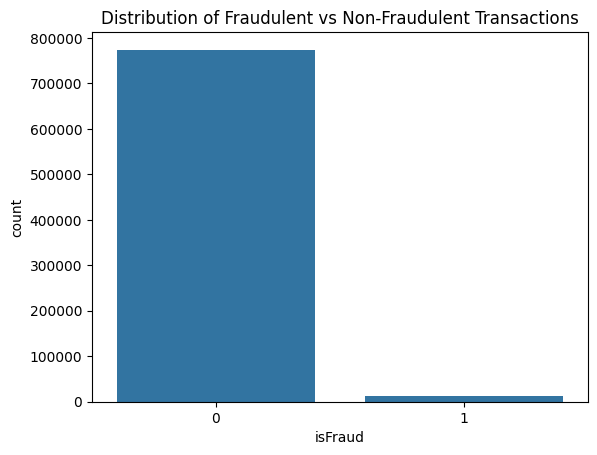

isFraud
0    773946
1     12417
Name: count, dtype: int64
isFraud
0    98.420958
1     1.579042
Name: count, dtype: float64


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable
sns.countplot(x='isFraud', data=df)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

# Display the count and percentage
fraud_counts = df['isFraud'].value_counts()
print(fraud_counts)
print(fraud_counts / len(df) * 100)

# **Correlation Analysis**

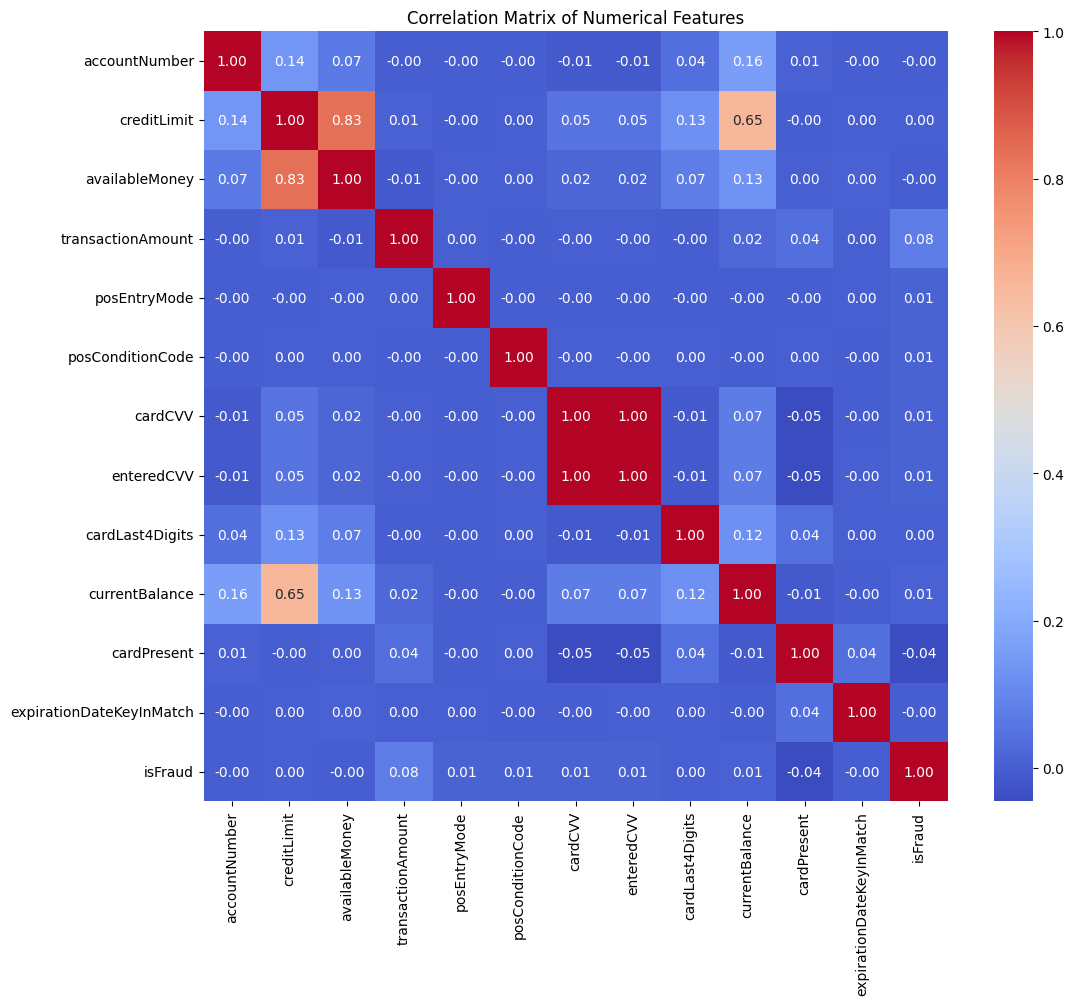

In [9]:
# Compute correlation matrix
corr_matrix = df[numerical_features].corr()

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# **Transaction Amount Distribution by Fraud Status**

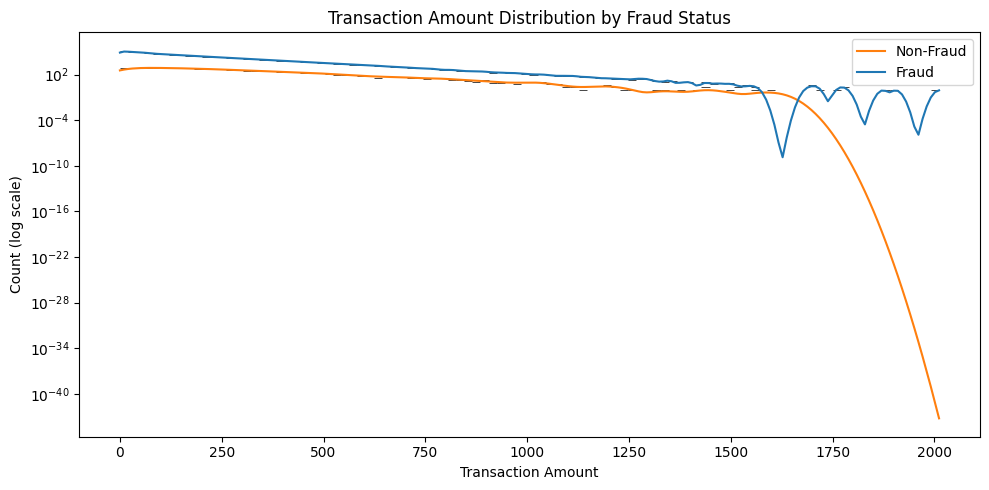

(isFraud
 0    773946
 1     12417
 Name: count, dtype: int64,
 np.float64(0.01579041740264992),
        accountNumber    creditLimit  availableMoney  \
 count   7.863630e+05  786363.000000   786363.000000   
 mean    5.372326e+08   10759.464459     6250.725369   
 min     1.000881e+08     250.000000    -1005.630000   
 25%     3.301333e+08    5000.000000     1077.420000   
 50%     5.074561e+08    7500.000000     3184.860000   
 75%     7.676200e+08   15000.000000     7500.000000   
 max     9.993896e+08   50000.000000    50000.000000   
 std     2.554211e+08   11636.174890     8880.783989   
 
                  transactionDateTime  transactionAmount   posEntryMode  \
 count                         786363      786363.000000  782309.000000   
 mean   2016-07-06 01:58:58.395681536         136.985791       9.049943   
 min              2016-01-01 00:01:02           0.000000       2.000000   
 25%              2016-04-06 19:35:07          33.650000       2.000000   
 50%              2016

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert transactionDateTime to datetime
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])

# Basic stats
fraud_counts = df['isFraud'].value_counts()
fraud_ratio = df['isFraud'].mean()

# Summary of numerical columns
num_summary = df.describe()

# Fraud vs Non-Fraud transaction amount distribution
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='transactionAmount', hue='isFraud', bins=100, log_scale=(False, True), kde=True)
plt.title('Transaction Amount Distribution by Fraud Status')
plt.xlabel('Transaction Amount')
plt.ylabel('Count (log scale)')
plt.legend(['Non-Fraud', 'Fraud'])
plt.tight_layout()
plt.show()

fraud_counts, fraud_ratio, num_summary


# **Univariate Analysis**

**Transaction Amount Distribution**

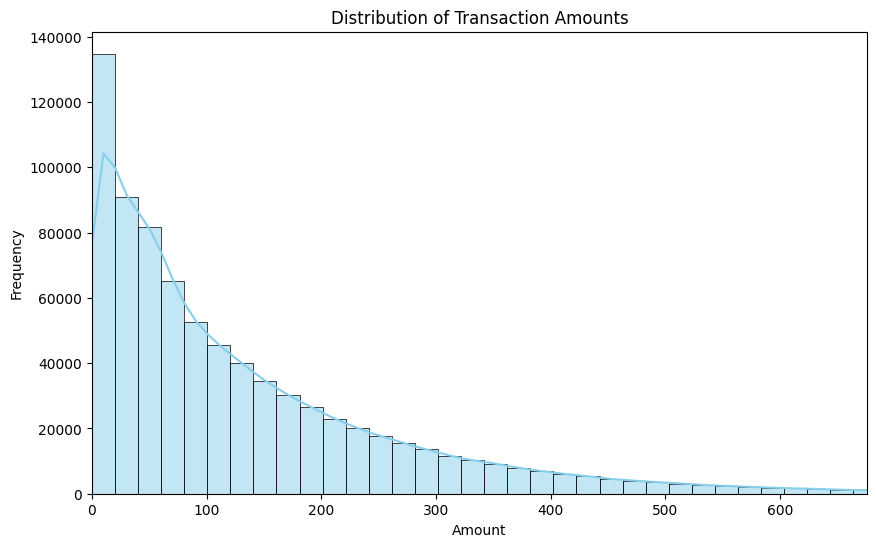

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['transactionAmount'], bins=100, kde=True, color='skyblue')
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.xlim(0, df['transactionAmount'].quantile(0.99))  # zoom in to avoid outliers dominating
plt.show()

**Transaction Time Analysis**

<ipython-input-12-b72041e11da0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='hour', palette='viridis')


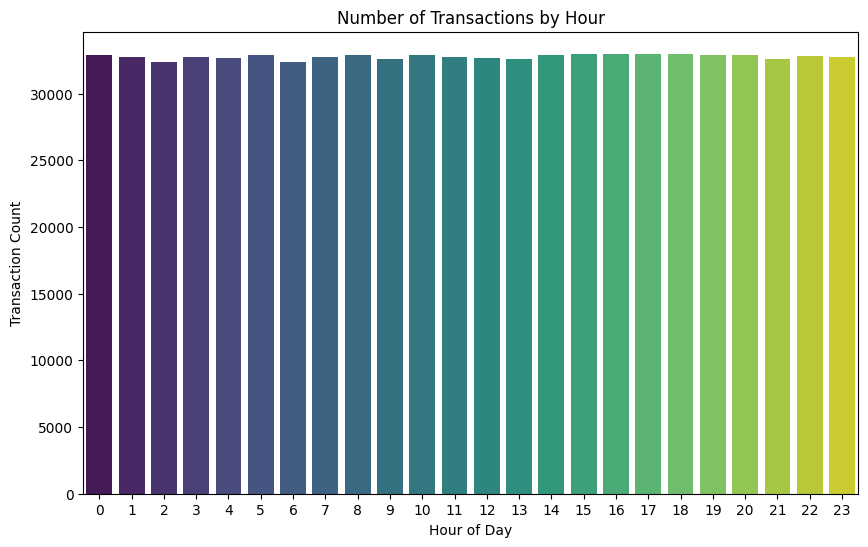

In [12]:
# Convert to datetime
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])

# Extract hour
df['hour'] = df['transactionDateTime'].dt.hour

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='hour', palette='viridis')
plt.title("Number of Transactions by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Transaction Count")
plt.show()

**Merchant Category Frequency**

<ipython-input-13-bb9065378088>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='coolwarm')


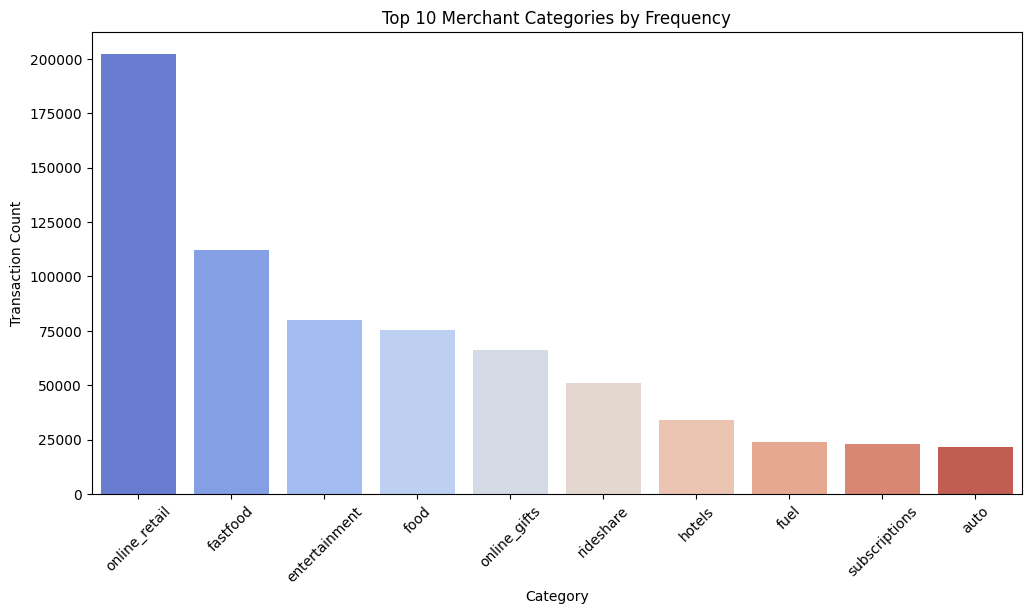

In [13]:
# Top 10 categories
top_categories = df['merchantCategoryCode'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.index, y=top_categories.values, palette='coolwarm')
plt.title("Top 10 Merchant Categories by Frequency")
plt.xlabel("Category")
plt.ylabel("Transaction Count")
plt.xticks(rotation=45)
plt.show()

**Transaction Type**

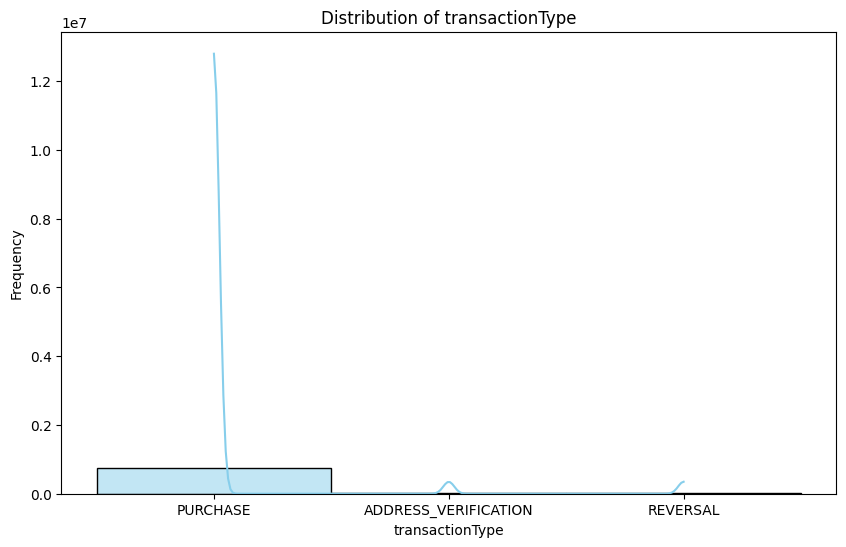

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['transactionType'], bins=5, kde=True, color='skyblue')
plt.title("Distribution of transactionType")
plt.xlabel("transactionType")
plt.ylabel("Frequency")
#plt.xlim(0, df['transactionType'].quantile(0.99))  # zoom in to avoid outliers dominating
plt.show()

**Card Present**

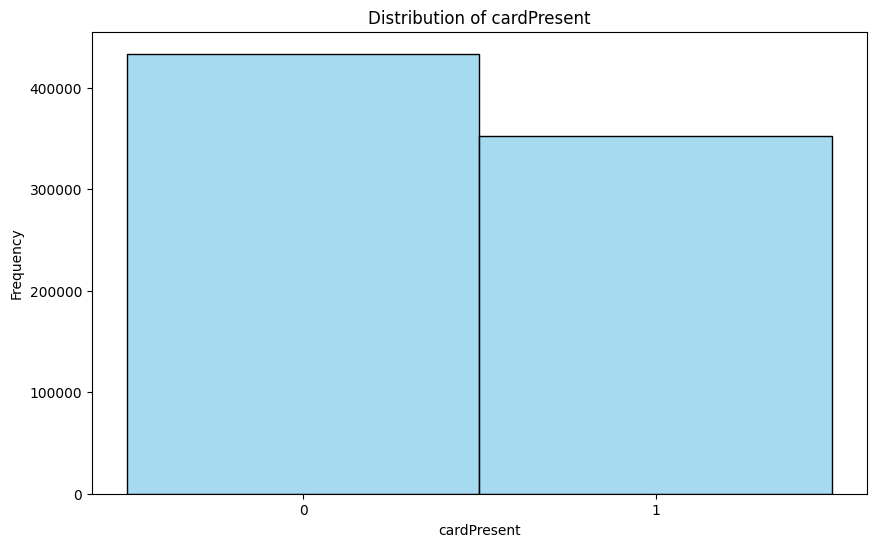

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['cardPresent'], bins=2, discrete=True, color='skyblue')
plt.title("Distribution of cardPresent")
plt.xlabel("cardPresent")
plt.ylabel("Frequency")
plt.xticks([0, 1])  # Ensure only 0 and 1 are shown on the x-axis
plt.show()

# **Bivariate Analysis**

**Transaction Amount by Merchant Category**

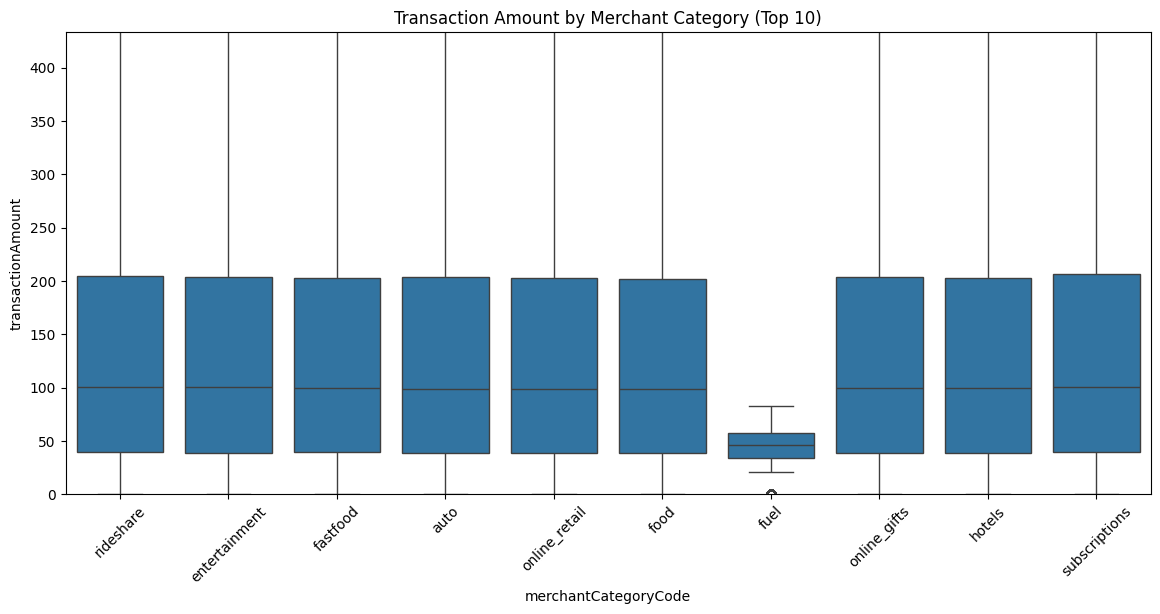

In [16]:
plt.figure(figsize=(14, 6))
top_categories = df['merchantCategoryCode'].value_counts().nlargest(10).index
sns.boxplot(data=df[df['merchantCategoryCode'].isin(top_categories)],
            x='merchantCategoryCode', y='transactionAmount')
plt.title('Transaction Amount by Merchant Category (Top 10)')
plt.xticks(rotation=45)
plt.ylim(0, df['transactionAmount'].quantile(0.95))  # zoom in
plt.show()

**Transaction Amount Over Hour of Day**

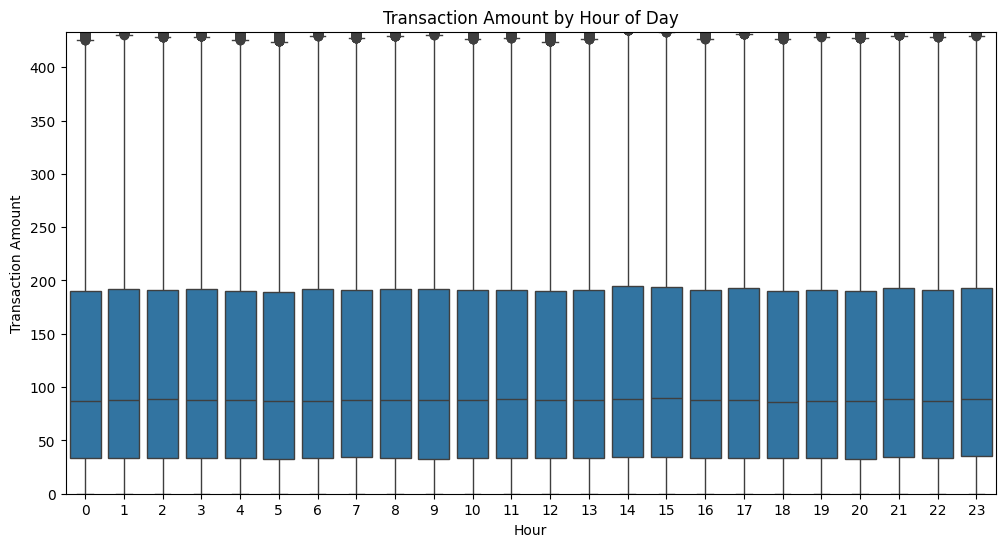

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='hour', y='transactionAmount')
plt.title("Transaction Amount by Hour of Day")
plt.ylim(0, df['transactionAmount'].quantile(0.95))  # to avoid outlier distortion
plt.xlabel("Hour")
plt.ylabel("Transaction Amount")
plt.show()

**Transaction Amount: Fraud vs Non-Fraud**



<ipython-input-18-6f71409e4264>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='isFraud', y='transactionAmount', palette='Set2')


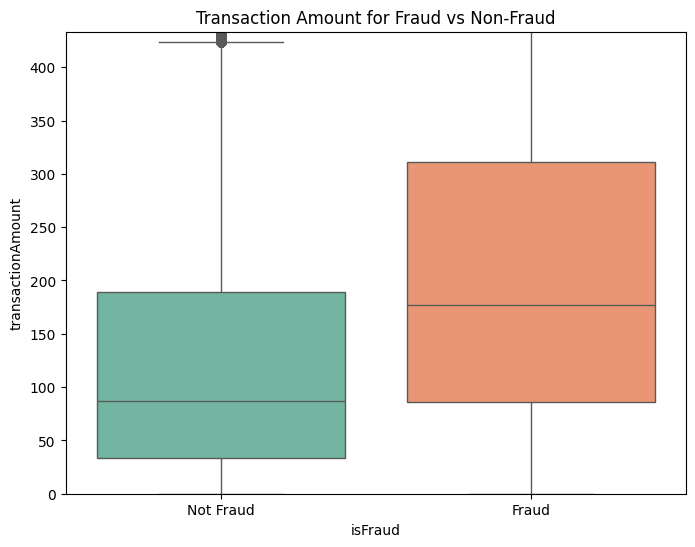

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='isFraud', y='transactionAmount', palette='Set2')
plt.title("Transaction Amount for Fraud vs Non-Fraud")
plt.ylim(0, df['transactionAmount'].quantile(0.95))
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.show()

**Fraud Rate by Merchant name and Category**

<ipython-input-19-e50bf504f932>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-19-e50bf504f932>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


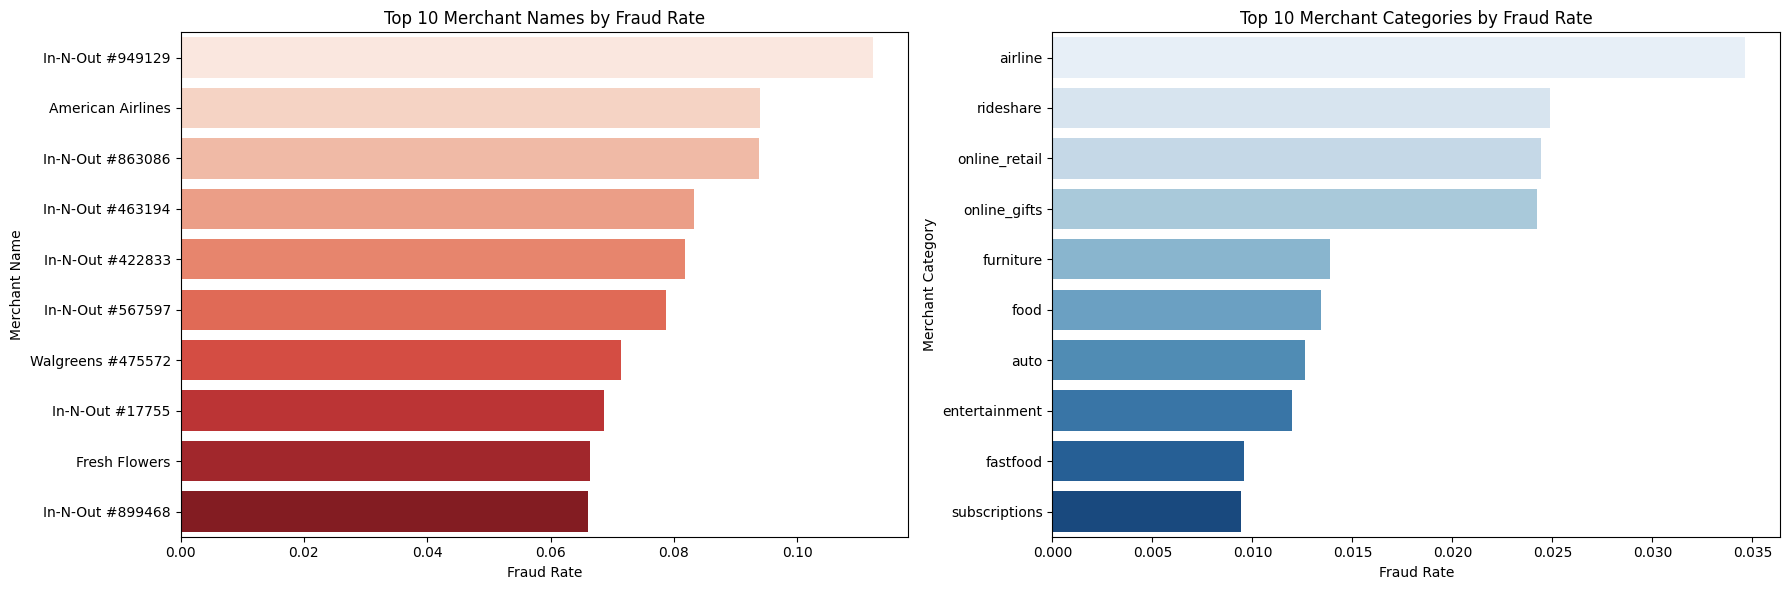

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate top 10 merchant names by fraud rate
fraud_rate_merchant = df.groupby('merchantName')['isFraud'].mean().sort_values(ascending=False).head(10)

# Calculate top 10 merchant categories by fraud rate
fraud_rate_category = df.groupby('merchantCategoryCode')['isFraud'].mean().sort_values(ascending=False).head(10)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for Merchant Names
sns.barplot(
    x=fraud_rate_merchant.values,
    y=fraud_rate_merchant.index,
    palette='Reds',
    ax=axes[0]
)
axes[0].set_title('Top 10 Merchant Names by Fraud Rate')
axes[0].set_xlabel('Fraud Rate')
axes[0].set_ylabel('Merchant Name')

# Plot for Merchant Categories
sns.barplot(
    x=fraud_rate_category.values,
    y=fraud_rate_category.index,
    palette='Blues',
    ax=axes[1]
)
axes[1].set_title('Top 10 Merchant Categories by Fraud Rate')
axes[1].set_xlabel('Fraud Rate')
axes[1].set_ylabel('Merchant Category')

plt.tight_layout()
plt.show()


**Fraud Rate by Card Present**

<ipython-input-20-bc860851d2eb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_card_present.index, y=fraud_card_present.values, palette='coolwarm')


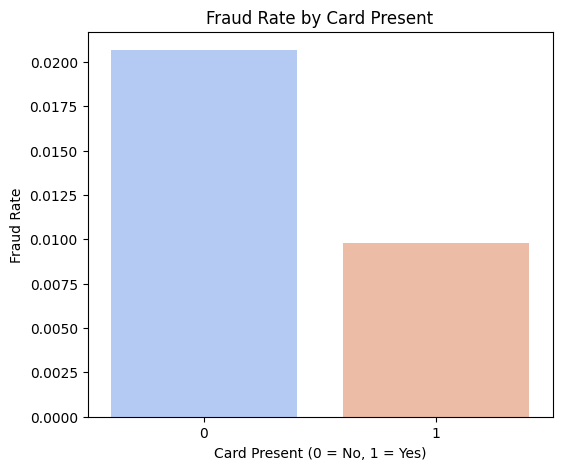

In [20]:
fraud_card_present = df.groupby('cardPresent')['isFraud'].mean()

plt.figure(figsize=(6, 5))
sns.barplot(x=fraud_card_present.index, y=fraud_card_present.values, palette='coolwarm')
plt.title("Fraud Rate by Card Present")
plt.xlabel("Card Present (0 = No, 1 = Yes)")
plt.ylabel("Fraud Rate")
plt.show()

**Fraud rate by hour of the day, day of the week and month**

<ipython-input-21-d2c51b7b854e>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_by_day.index, y=fraud_by_day.values, palette='magma', ax=axes[1])
<ipython-input-21-d2c51b7b854e>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_by_month.index, y=fraud_by_month.values, palette='flare', ax=axes[2])


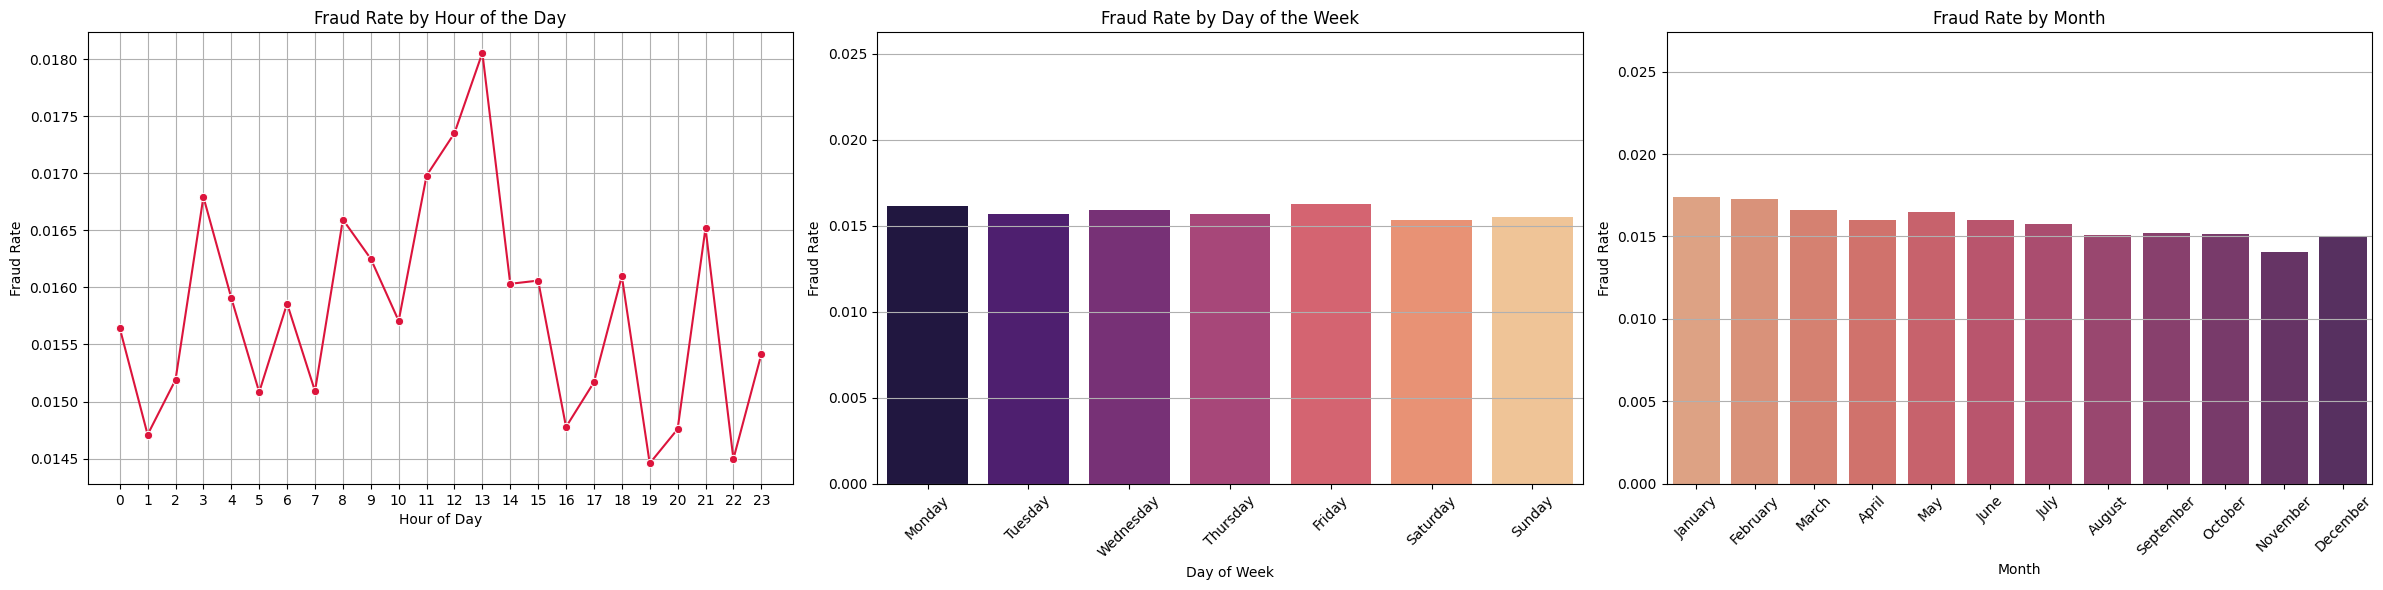

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data (assuming df already loaded and transactionDateTime parsed)

# Fraud rate by hour
fraud_by_hour = df.groupby('hour')['isFraud'].mean()

# Extract day name and calculate fraud rate by day of week
df['day_of_week'] = df['transactionDateTime'].dt.day_name()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fraud_by_day = df.groupby('day_of_week')['isFraud'].mean().reindex(weekday_order)

# Extract month and calculate fraud rate by month
df['month'] = df['transactionDateTime'].dt.month_name()
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
fraud_by_month = df.groupby('month')['isFraud'].mean().reindex(month_order)

# Plot all three subplots
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# Fraud rate by hour
sns.lineplot(x=fraud_by_hour.index, y=fraud_by_hour.values, marker='o', color='crimson', ax=axes[0])
axes[0].set_title("Fraud Rate by Hour of the Day")
axes[0].set_xlabel("Hour of Day")
axes[0].set_ylabel("Fraud Rate")
axes[0].set_xticks(range(0, 24))
axes[0].grid(True)

# Fraud rate by day of week
sns.barplot(x=fraud_by_day.index, y=fraud_by_day.values, palette='magma', ax=axes[1])
axes[1].set_title("Fraud Rate by Day of the Week")
axes[1].set_xlabel("Day of Week")
axes[1].set_ylabel("Fraud Rate")
axes[1].set_ylim(0, fraud_by_day.max() + 0.01)
axes[1].grid(axis='y')
axes[1].tick_params(axis='x', rotation=45)

# Fraud rate by month
sns.barplot(x=fraud_by_month.index, y=fraud_by_month.values, palette='flare', ax=axes[2])
axes[2].set_title("Fraud Rate by Month")
axes[2].set_xlabel("Month")
axes[2].set_ylabel("Fraud Rate")
axes[2].set_ylim(0, fraud_by_month.max() + 0.01)
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(axis='y')

plt.tight_layout()
plt.show()


**Fraud rate by Acquirer Country**

<ipython-input-22-6d2769b09c79>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_fraud_countries.index, y=top_fraud_countries.values, palette='rocket')


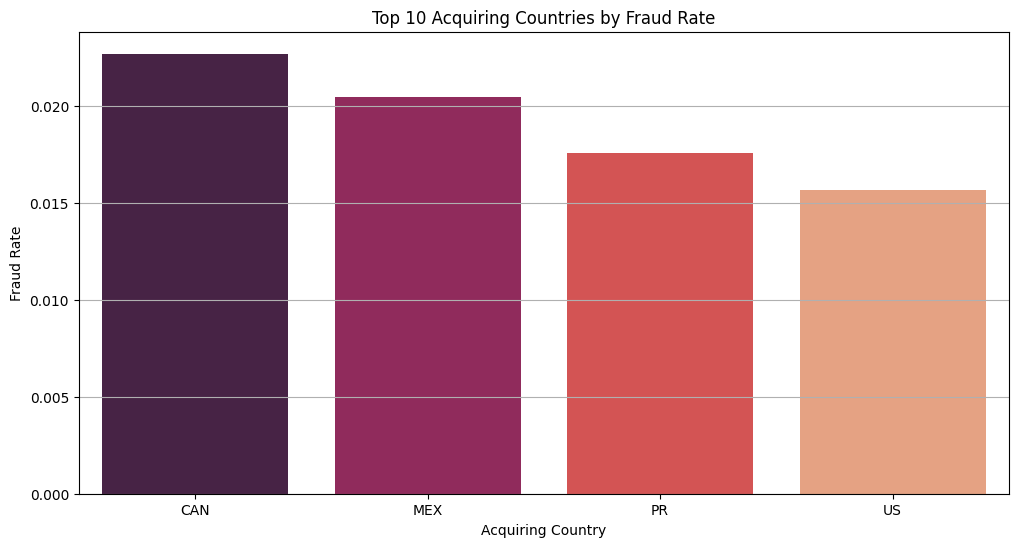

In [22]:
# Drop missing values in acqCountry
df_country = df.dropna(subset=['acqCountry'])

# Compute fraud rate by acqCountry
fraud_by_country = df_country.groupby('acqCountry')['isFraud'].mean()

# Sort by fraud rate and take top 10
top_fraud_countries = fraud_by_country.sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=top_fraud_countries.index, y=top_fraud_countries.values, palette='rocket')
plt.title("Top 10 Acquiring Countries by Fraud Rate")
plt.xlabel("Acquiring Country")
plt.ylabel("Fraud Rate")
plt.grid(axis='y')
plt.show()

# **Peak Spending Times (Hourly & Daily Patterns)**

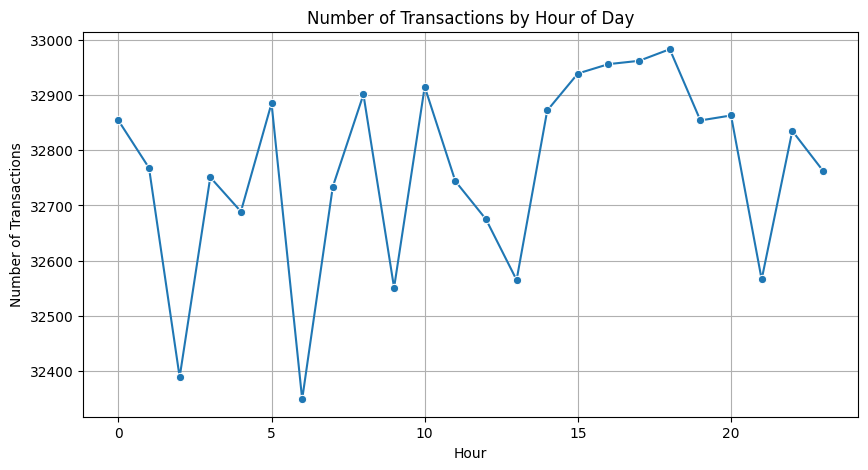

In [23]:
# Already extracted 'hour' column
hourly_counts = df['hour'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o')
plt.title("Number of Transactions by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Transactions")
plt.grid(True)
plt.show()

# **Number of Transactions by Day of Week**

<ipython-input-24-d81901a306d7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_counts.index, y=daily_counts.values, palette='Set3')


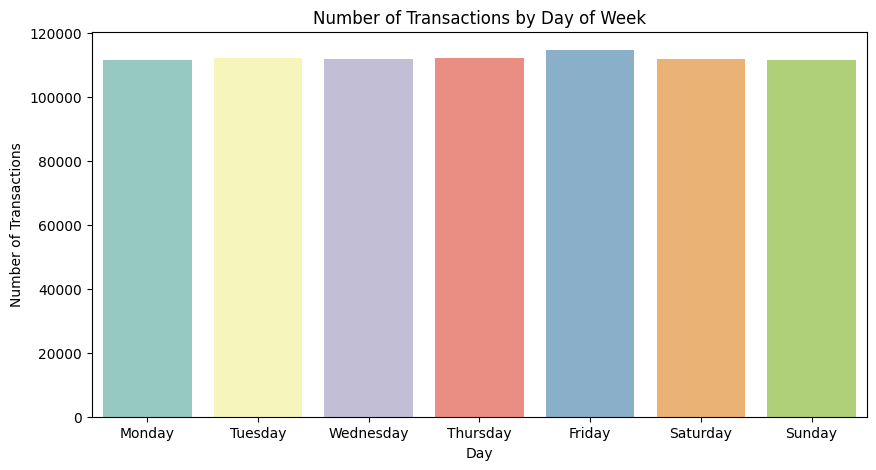

In [24]:
df['day_of_week'] = df['transactionDateTime'].dt.day_name()

daily_counts = df['day_of_week'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 5))
sns.barplot(x=daily_counts.index, y=daily_counts.values, palette='Set3')
plt.title("Number of Transactions by Day of Week")
plt.xlabel("Day")
plt.ylabel("Number of Transactions")
plt.show()

# **High-Value Merchant Categories**

<ipython-input-25-c8a91fc2c658>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_amount_by_category.index, y=avg_amount_by_category.values, palette='Blues_d')


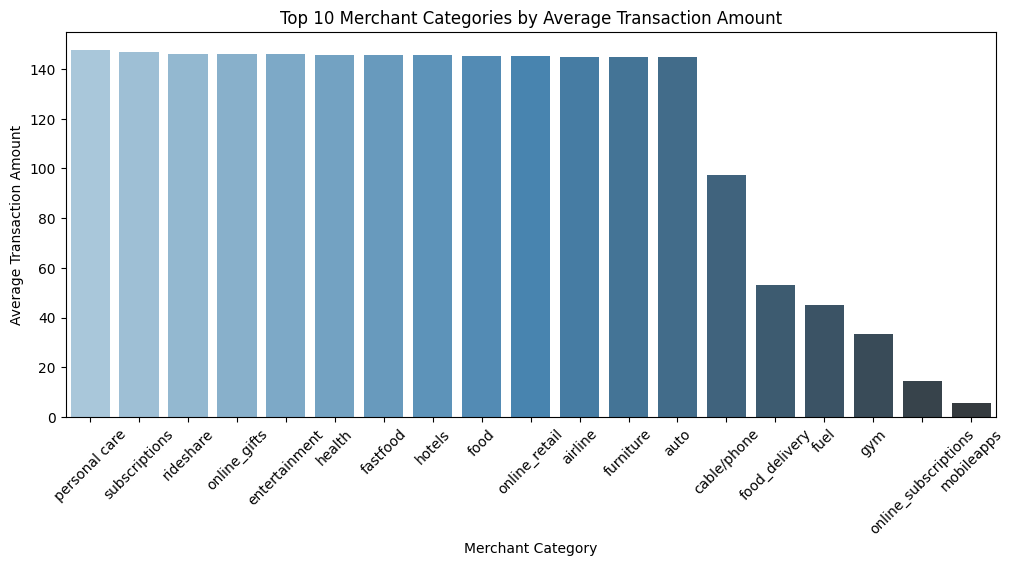

In [25]:
avg_amount_by_category = df.groupby('merchantCategoryCode')['transactionAmount'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(x=avg_amount_by_category.index, y=avg_amount_by_category.values, palette='Blues_d')
plt.title("Top 10 Merchant Categories by Average Transaction Amount")
plt.xlabel("Merchant Category")
plt.ylabel("Average Transaction Amount")
plt.xticks(rotation=45)
plt.show()

# **Check for missing values**

In [26]:
# Check for missing values
print(df.isnull().sum())

accountNumber                  0
creditLimit                    0
availableMoney                 0
transactionDateTime            0
merchantName                   0
transactionAmount              0
acqCountry                  4562
merchantCountryCode          724
posEntryMode                4054
posConditionCode             409
merchantCategoryCode           0
currentExpDate                 0
accountOpenDate                0
dateOfLastAddressChange        0
cardCVV                        0
enteredCVV                     0
cardLast4Digits                0
transactionType              698
currentBalance                 0
cardPresent                    0
expirationDateKeyInMatch       0
isFraud                        0
hour                           0
day_of_week                    0
month                          0
dtype: int64


# **Missing percentage**

In [27]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage = missing_percentage.map(lambda x: f"{x:.2f}%")
print(missing_percentage)

accountNumber               0.00%
creditLimit                 0.00%
availableMoney              0.00%
transactionDateTime         0.00%
merchantName                0.00%
transactionAmount           0.00%
acqCountry                  0.58%
merchantCountryCode         0.09%
posEntryMode                0.52%
posConditionCode            0.05%
merchantCategoryCode        0.00%
currentExpDate              0.00%
accountOpenDate             0.00%
dateOfLastAddressChange     0.00%
cardCVV                     0.00%
enteredCVV                  0.00%
cardLast4Digits             0.00%
transactionType             0.09%
currentBalance              0.00%
cardPresent                 0.00%
expirationDateKeyInMatch    0.00%
isFraud                     0.00%
hour                        0.00%
day_of_week                 0.00%
month                       0.00%
dtype: object


# **Fill missing values**

In [28]:
categorical_missing = [
    'acqCountry',
    'merchantCountryCode',
    'posEntryMode',
    'posConditionCode',
    'transactionType'
]

for col in categorical_missing:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)

missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage = missing_percentage.map(lambda x: f"{x:.2f}%")
print(missing_percentage)

<ipython-input-28-3bdd486a1d19>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val, inplace=True)


accountNumber               0.00%
creditLimit                 0.00%
availableMoney              0.00%
transactionDateTime         0.00%
merchantName                0.00%
transactionAmount           0.00%
acqCountry                  0.00%
merchantCountryCode         0.00%
posEntryMode                0.00%
posConditionCode            0.00%
merchantCategoryCode        0.00%
currentExpDate              0.00%
accountOpenDate             0.00%
dateOfLastAddressChange     0.00%
cardCVV                     0.00%
enteredCVV                  0.00%
cardLast4Digits             0.00%
transactionType             0.00%
currentBalance              0.00%
cardPresent                 0.00%
expirationDateKeyInMatch    0.00%
isFraud                     0.00%
hour                        0.00%
day_of_week                 0.00%
month                       0.00%
dtype: object


# **Removing outliers based on transaction amount**

<ipython-input-29-d4014430a546>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


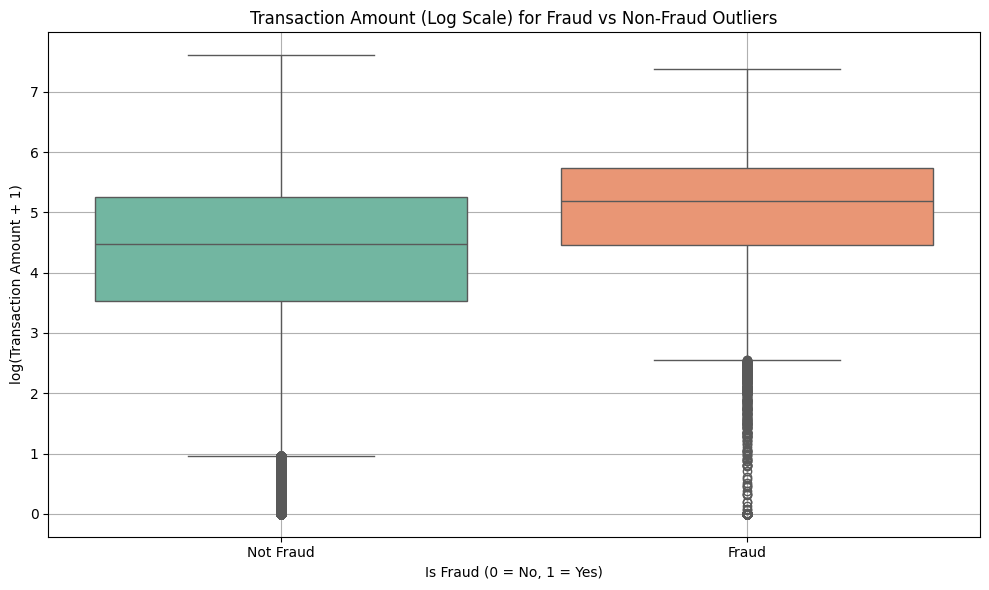

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 6))

# Add 1 to avoid log(0)
sns.boxplot(
    data=df,
    x='isFraud',
    y=np.log1p(df['transactionAmount']),  # log1p = log(1 + x) to handle zero values
    palette='Set2',
    showfliers=True
)

plt.title("Transaction Amount (Log Scale) for Fraud vs Non-Fraud Outliers")
plt.xlabel("Is Fraud (0 = No, 1 = Yes)")
plt.ylabel("log(Transaction Amount + 1)")
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.grid(True)
plt.tight_layout()
plt.show()


**Removing the outliers**

In [30]:
import pandas as pd

# Function to calculate IQR bounds
def get_outlier_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Get bounds separately for fraud and non-fraud
fraud_bounds = get_outlier_bounds(df[df['isFraud'] == 1]['transactionAmount'])
nonfraud_bounds = get_outlier_bounds(df[df['isFraud'] == 0]['transactionAmount'])

# Create conditions for inliers
fraud_condition = (
    (df['isFraud'] == 1) &
    (df['transactionAmount'] >= fraud_bounds[0]) &
    (df['transactionAmount'] <= fraud_bounds[1])
)

nonfraud_condition = (
    (df['isFraud'] == 0) &
    (df['transactionAmount'] >= nonfraud_bounds[0]) &
    (df['transactionAmount'] <= nonfraud_bounds[1])
)

# Keep only inliers from both groups
df_no_outliers = df[fraud_condition | nonfraud_condition].copy()

print(f"Original shape: {df.shape}")
print(f"After removing outliers: {df_no_outliers.shape}")


Original shape: (786363, 25)
After removing outliers: (745612, 25)


# **Splitting the data**

In [57]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_no_outliers.drop(columns=['isFraud'])  # drop target
y = df_no_outliers['isFraud']

# Split with stratification to keep class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 80% train, 20% test (adjust as needed)
    random_state=42,     # for reproducibility
    stratify=y           # important for imbalanced data!
)

print(f"Training set fraud rate: {y_train.mean():.4f}")
print(f"Test set fraud rate: {y_test.mean():.4f}")


Training set fraud rate: 0.0160
Test set fraud rate: 0.0160


# **Encode non-numeric columns**

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   accountNumber             786363 non-null  int64         
 1   creditLimit               786363 non-null  int64         
 2   availableMoney            786363 non-null  float64       
 3   transactionDateTime       786363 non-null  datetime64[ns]
 4   merchantName              786363 non-null  object        
 5   transactionAmount         786363 non-null  float64       
 6   acqCountry                786363 non-null  object        
 7   merchantCountryCode       786363 non-null  object        
 8   posEntryMode              786363 non-null  float64       
 9   posConditionCode          786363 non-null  float64       
 10  merchantCategoryCode      786363 non-null  object        
 11  currentExpDate            786363 non-null  object        
 12  ac

**Encode transactionDateTime**

In [59]:
def extract_datetime_features(df, datetime_col='transactionDateTime'):
    """
    Extract datetime features from a datetime column in the dataframe.

    Parameters:
        df (pd.DataFrame): Input dataframe containing the datetime column.
        datetime_col (str): Name of the datetime column to extract features from.

    Returns:
        pd.DataFrame: DataFrame with new datetime features and original datetime column dropped.
    """
    df = df.copy()  # avoid modifying original dataframe

    df[datetime_col] = pd.to_datetime(df[datetime_col], errors='coerce')

    df['transactionHour'] = df[datetime_col].dt.hour              # Hour of the day (0–23)
    df['transactionDay'] = df[datetime_col].dt.day                # Day of month (1–31)
    df['transactionWeekday'] = df[datetime_col].dt.weekday        # Monday=0, Sunday=6
    df['transactionMonth'] = df[datetime_col].dt.month            # Month (1–12)
    df['transactionYear'] = df[datetime_col].dt.year              # Year
    df['isWeekend'] = df[datetime_col].dt.weekday >= 5            # True if Saturday/Sunday

    df.drop(columns=[datetime_col], inplace=True)

    return df

X_train = extract_datetime_features(X_train, datetime_col='transactionDateTime')
X_test = extract_datetime_features(X_test, datetime_col='transactionDateTime')

**Encode merchantName**

In [61]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

class SmoothedTargetEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, column, smoothing=100):
        self.column = column
        self.smoothing = smoothing
        self.mapping_ = None
        self.global_mean_ = None

    def fit(self, X, y):
        # Store global mean from target
        self.global_mean_ = y.mean()

        # Combine X and y to compute group stats
        temp = pd.DataFrame({self.column: X[self.column], 'target': y})
        agg = temp.groupby(self.column)['target'].agg(['mean', 'count'])
        agg['smoothed'] = (
            agg['mean'] * agg['count'] + self.global_mean_ * self.smoothing
        ) / (agg['count'] + self.smoothing)

        self.mapping_ = agg['smoothed']
        return self

    def transform(self, X):
        X = X.copy()
        X[f'{self.column}_target'] = X[self.column].map(self.mapping_).fillna(self.global_mean_)
        X.drop(columns=[self.column], inplace=True)
        return X

from sklearn.pipeline import Pipeline

encoder_pipeline = Pipeline([
    ('merchant_encoder', SmoothedTargetEncoder(column='merchantName', smoothing=100)),
])


# Fit on training data
encoder_pipeline.fit(X_train, y_train)

# Transform train and test
X_train = encoder_pipeline.transform(X_train)
X_test = encoder_pipeline.transform(X_test)

**Encode acqCountry**

In [63]:
X_train = pd.get_dummies(X_train, columns=['acqCountry'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['acqCountry'], drop_first=True)

**Encode merchantCountryCode**

In [64]:
X_train = pd.get_dummies(X_train, columns=['merchantCountryCode'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['merchantCountryCode'], drop_first=True)

**Encode merchantCategoryCode**

In [65]:
X_train = pd.get_dummies(X_train, columns=['merchantCategoryCode'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['merchantCategoryCode'], drop_first=True)

**Encode currentExpDate**

In [66]:
import pandas as pd
import numpy as np

def parse_exp_date(val):
    try:
        # If value is like '31-Aug'
        if '-' in val and val.split('-')[0].isdigit():
            return pd.to_datetime(val + '-2025', format='%d-%b-%Y', errors='coerce')  # Assume year if missing
        else:
            return pd.to_datetime('01-' + val, format='%d-%b-%y', errors='coerce')  # For 'Mar-33'
    except:
        return np.nan


X_train['currentExpDate_parsed'] = X_train['currentExpDate'].apply(parse_exp_date)
X_test['currentExpDate_parsed'] = X_test['currentExpDate'].apply(parse_exp_date)

# Months until expiry
from dateutil.relativedelta import relativedelta

# Define function to compute months between two dates
def months_diff(d1, d2):
    if pd.isnull(d1) or pd.isnull(d2):
        return np.nan
    r = relativedelta(d1, d2)
    return r.years * 12 + r.months

# Apply the function to compute months until expiration
X_train['months_until_expiry'] = X_train['currentExpDate_parsed'].apply(lambda x: months_diff(x, pd.to_datetime('today')))
X_test['months_until_expiry'] = X_test['currentExpDate_parsed'].apply(lambda x: months_diff(x, pd.to_datetime('today')))


# Or extract month and year separately
X_train['exp_month'] = X_train['currentExpDate_parsed'].dt.month
X_train['exp_year'] = X_test['currentExpDate_parsed'].dt.year

X_test['exp_month'] = X_train['currentExpDate_parsed'].dt.month
X_test['exp_year'] = X_test['currentExpDate_parsed'].dt.year


# Apply parser
X_train.drop(columns=['currentExpDate', 'currentExpDate_parsed'], inplace=True)
X_test.drop(columns=['currentExpDate', 'currentExpDate_parsed'], inplace=True)

**Drop day_of_week and month**

In [70]:
X_train.drop(columns=['day_of_week', 'month'], inplace=True)
X_test.drop(columns=['day_of_week', 'month'], inplace=True)

**Encode accountOpenDate**

In [72]:
'''
import pandas as pd
from datetime import datetime

df['accountOpenDate'] = pd.to_datetime(df['accountOpenDate'], errors='coerce')

# Get current date
today = pd.to_datetime('today')

# Calculate age in days
df['account_age_days'] = (today - df['accountOpenDate']).dt.days

# Optional: also calculate age in months (rounded)
df['account_age_months'] = (df['account_age_days'] / 30.44).round().astype('Int32')  # 30.44 = avg days per month

df.drop(columns=['accountOpenDate'], inplace=True)
'''

import pandas as pd

def process_account_open_date(df):
    """
    Converts 'accountOpenDate' to datetime, calculates account age in days and months,
    and drops the original column.

    Parameters:
        df (pd.DataFrame): Input DataFrame with 'accountOpenDate' column.

    Returns:
        pd.DataFrame: Updated DataFrame with account age features.
    """
    df = df.copy()

    df['accountOpenDate'] = pd.to_datetime(df['accountOpenDate'], errors='coerce')
    today = pd.to_datetime('today')

    df['account_age_days'] = (today - df['accountOpenDate']).dt.days
    df['account_age_months'] = (df['account_age_days'] / 30.44).round().astype('Int32')

    df.drop(columns=['accountOpenDate'], inplace=True)

    return df

X_train = process_account_open_date(X_train)
X_test = process_account_open_date(X_test)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 596489 entries, 477546 to 117048
Data columns (total 51 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   accountNumber                              596489 non-null  int64  
 1   creditLimit                                596489 non-null  int64  
 2   availableMoney                             596489 non-null  float64
 3   transactionAmount                          596489 non-null  float64
 4   posEntryMode                               596489 non-null  float64
 5   posConditionCode                           596489 non-null  float64
 6   dateOfLastAddressChange                    596489 non-null  object 
 7   cardCVV                                    596489 non-null  int64  
 8   enteredCVV                                 596489 non-null  int64  
 9   cardLast4Digits                            596489 non-null  int64  
 10  transact

**Encode dateOfLastAddressChange**

In [73]:
'''
df['dateOfLastAddressChange'] = pd.to_datetime(df['dateOfLastAddressChange'], errors='coerce')
today = pd.to_datetime('today')

# Age in days
df['address_change_days_ago'] = (today - df['dateOfLastAddressChange']).dt.days

# Optional: in months
df['address_change_months_ago'] = (df['address_change_days_ago'] / 30.44).round().astype('Int32')

df.drop(columns=['dateOfLastAddressChange'], inplace=True)
'''

import pandas as pd

def process_address_change_date(df):
    """
    Converts 'dateOfLastAddressChange' to datetime, calculates how long ago the address was changed
    in days and months, and drops the original column.

    Parameters:
        df (pd.DataFrame): Input DataFrame with 'dateOfLastAddressChange' column.

    Returns:
        pd.DataFrame: Updated DataFrame with address change age features.
    """
    df = df.copy()

    df['dateOfLastAddressChange'] = pd.to_datetime(df['dateOfLastAddressChange'], errors='coerce')
    today = pd.to_datetime('today')

    df['address_change_days_ago'] = (today - df['dateOfLastAddressChange']).dt.days
    df['address_change_months_ago'] = (df['address_change_days_ago'] / 30.44).round().astype('Int32')

    df.drop(columns=['dateOfLastAddressChange'], inplace=True)

    return df

X_train = process_address_change_date(X_train)
X_test = process_address_change_date(X_test)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 596489 entries, 477546 to 117048
Data columns (total 52 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   accountNumber                              596489 non-null  int64  
 1   creditLimit                                596489 non-null  int64  
 2   availableMoney                             596489 non-null  float64
 3   transactionAmount                          596489 non-null  float64
 4   posEntryMode                               596489 non-null  float64
 5   posConditionCode                           596489 non-null  float64
 6   cardCVV                                    596489 non-null  int64  
 7   enteredCVV                                 596489 non-null  int64  
 8   cardLast4Digits                            596489 non-null  int64  
 9   transactionType                            596489 non-null  object 
 10  currentB

**Encode transactionType**

In [74]:
'''
from sklearn.preprocessing import LabelEncoder

# Fill any missing values if needed
df['transactionType'] = df['transactionType'].fillna('Unknown')

# Apply label encoding
le = LabelEncoder()
df['transactionType_encoded'] = le.fit_transform(df['transactionType'])

df.drop(columns=['transactionType'], inplace=True)
'''

from sklearn.preprocessing import LabelEncoder
import pandas as pd

def encode_transaction_type(df, encoder=None):
    """
    Label encodes the 'transactionType' column and drops the original.

    Parameters:
        df (pd.DataFrame): Input DataFrame containing 'transactionType'.
        encoder (LabelEncoder, optional): Pre-fitted LabelEncoder for consistency between train/test.

    Returns:
        df (pd.DataFrame): Updated DataFrame with encoded column.
        encoder (LabelEncoder): The fitted LabelEncoder (useful for test data).
    """
    df = df.copy()

    df['transactionType'] = df['transactionType'].fillna('Unknown')

    if encoder is None:
        encoder = LabelEncoder()
        df['transactionType_encoded'] = encoder.fit_transform(df['transactionType'])
    else:
        df['transactionType_encoded'] = encoder.transform(df['transactionType'])

    df.drop(columns=['transactionType'], inplace=True)

    return df, encoder

X_train, tx_type_encoder = encode_transaction_type(X_train)
X_test, _ = encode_transaction_type(X_test, encoder=tx_type_encoder)


# **Check for Multi-colinearity**

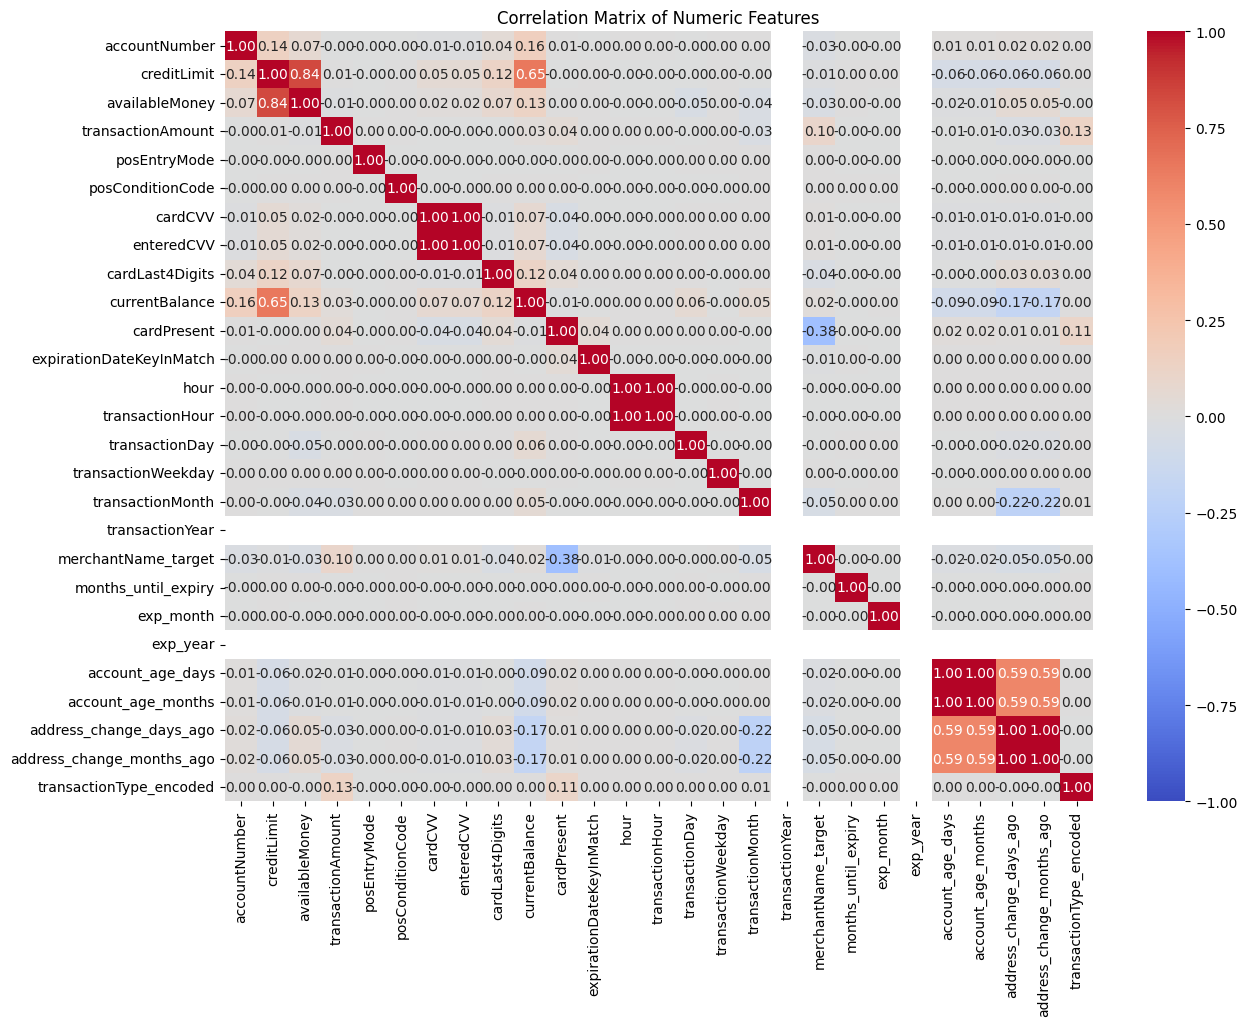

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric features (exclude bool and categorical)
numeric_cols = X_train.select_dtypes(include=['int64', 'float64', 'int32']).columns

# Correlation matrix
corr_matrix = X_train[numeric_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

# **Detect multicollinearity and delete unwanted columns**

In [76]:
import numpy as np
import pandas as pd

def remove_highly_correlated_features(X_train, X_test, threshold=0.9):
    # Compute correlation matrix
    corr_matrix = X_train.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find features with correlation greater than threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

    # Drop from both train and test
    X_train_dropped = X_train.drop(columns=to_drop)
    X_test_dropped = X_test.drop(columns=to_drop)

    print(f"Columns dropped due to multicollinearity (threshold={threshold}):")
    print(to_drop)

    return X_train_dropped, X_test_dropped

X_train_cleaned, X_test_cleaned = remove_highly_correlated_features(X_train, X_test)

Columns dropped due to multicollinearity (threshold=0.9):
['enteredCVV', 'transactionHour', 'merchantCountryCode_MEX', 'merchantCountryCode_PR', 'merchantCountryCode_US', 'account_age_months', 'address_change_months_ago']


In [77]:
X_train = X_train_cleaned
X_test = X_test_cleaned

# **XGBoost Training & Evaluation Code**

In [78]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Initialize XGBoost with class imbalance handling
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),  # imbalance ratio
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

# Fit the model
xgb.fit(X_train, y_train)

# Predict on test set
y_pred = xgb.predict(X_test)
y_proba = xgb.predict_proba(X_test)[:, 1]

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:11:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix:
[[113904  32831]
 [   679   1709]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.78      0.87    146735
           1       0.05      0.72      0.09      2388

    accuracy                           0.78    149123
   macro avg       0.52      0.75      0.48    149123
weighted avg       0.98      0.78      0.86    149123

ROC AUC Score: 0.8209138941033584


# **Baseline Model Selection**

Model Chosen: XGBoost Classifier

Justification:

The dataset is highly imbalanced with a very small number of fraud cases.

XGBoost is a robust tree-based ensemble method that handles:

Missing values

Mixed feature types

Non-linear relationships

Large datasets efficiently

It also allows for custom evaluation metrics and class weighting, making it well-suited for fraud detection problems.

# **Evaluation Metric Selection**

Primary Metric: Recall (Sensitivity) for the fraud class (isFraud == 1)

Why Recall?

In fraud detection, missing an actual fraud case (False Negative) is much more costly than a false alarm (False Positive).

High recall ensures that most fraudulent transactions are detected, which is critical in a real-world financial context.

Even if precision is low (many false positives), it’s acceptable because flagged transactions can undergo human review.

# **Results**

After preprocessing the data, engineering relevant features, handling class imbalance, and applying the XGBoost classifier, the model achieved the following performance metrics on the test set:

Accuracy: ~78%

Precision (Fraud Class): ~5%

Recall (Fraud Class): ~72%

F1 Score (Fraud Class): ~9%

ROC AUC Score: 0.82

These results reflect the model’s ability to detect fraudulent transactions in a highly imbalanced dataset. While the overall accuracy is high, it is not a reliable metric due to class imbalance. Instead, the recall for the fraud class is more meaningful—it indicates that the model is able to correctly identify about 72% of the actual fraudulent transactions.

However, the precision is low, meaning there are a significant number of false positives (legitimate transactions flagged as fraud). This trade-off is typical in fraud detection, where catching fraud is more critical than minimizing false alerts.

These metrics suggest the model is effective at identifying fraudulent activity but could be improved further by:

Tuning thresholds to balance precision and recall

Applying advanced resampling techniques

Using ensemble models or anomaly detection methods for boosting performance



# **Discussion**

This project demonstrates the complexity of detecting fraudulent transactions due to the extreme class imbalance—fraudulent transactions represent a very small fraction of the total data.

Despite this challenge, the XGBoost model achieved:

ROC AUC Score: 0.82

Recall (Fraud Class): 72%

Precision (Fraud Class): 5%

These results indicate that while the model is able to capture the majority of fraud cases (high recall), it also generates a significant number of false positives (low precision). In fraud detection, this trade-off is often acceptable since missing a fraudulent transaction can be costlier than investigating a false alarm.

The analysis also uncovered valuable patterns based on features such as:

Time of day (hourly trends in fraud)

Merchant-related characteristics

Transaction amount outliers

These features contributed meaningfully to detecting anomalies in behavior indicative of fraud.

# **Next Steps**

To further enhance this model and pipeline, the following improvements are suggested:

Threshold Tuning: Optimize the decision threshold to better control the balance between precision and recall.

Advanced Resampling: Try SMOTE, ADASYN, or ensemble undersampling techniques to tackle class imbalance more effectively.

Model Ensembling: Combine XGBoost with models like Random Forest or LightGBM for more robust predictions.

Unsupervised Learning: Experiment with anomaly detection methods such as Isolation Forest, Autoencoders, or One-Class SVM.

Feature Engineering: Develop advanced features like:

Time since last transaction

User transaction frequency

Geolocation-based inconsistencies

Real-time Monitoring: Implement drift detection mechanisms to adapt to changing fraud patterns over time.

A/B Testing: Compare model-based detection against rule-based systems in a controlled production setting.

These next steps aim to reduce false positives and adapt the model to real-world, evolving fraud behavior.

# **Conclusion**

This project successfully demonstrates the application of machine learning techniques to the challenging problem of credit card fraud detection. Through rigorous data preprocessing, feature engineering, and the use of XGBoost, we built a model that achieves:

A high recall on fraudulent transactions (72%), which is critical in minimizing missed fraud.

A ROC AUC score of 0.82, indicating strong overall model discrimination capability.

While the model still produces false positives (low precision), this is often acceptable in fraud detection scenarios, where catching as many fraud cases as possible outweighs the cost of investigating legitimate ones.

Key takeaways include:

Time-based patterns (hour, day, month) and merchant-related features are important predictors.

Handling class imbalance effectively is crucial for realistic performance.

Feature engineering and thoughtful preprocessing significantly impact the model's success.

This analysis lays the groundwork for a practical fraud detection system that can be refined and deployed in real-world financial environments. With further enhancements and monitoring strategies, the system can evolve to adapt to emerging fraud trends.